In [1]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from Convolution import createWaves
from CNOTcalculator import calculateCNOT
import json

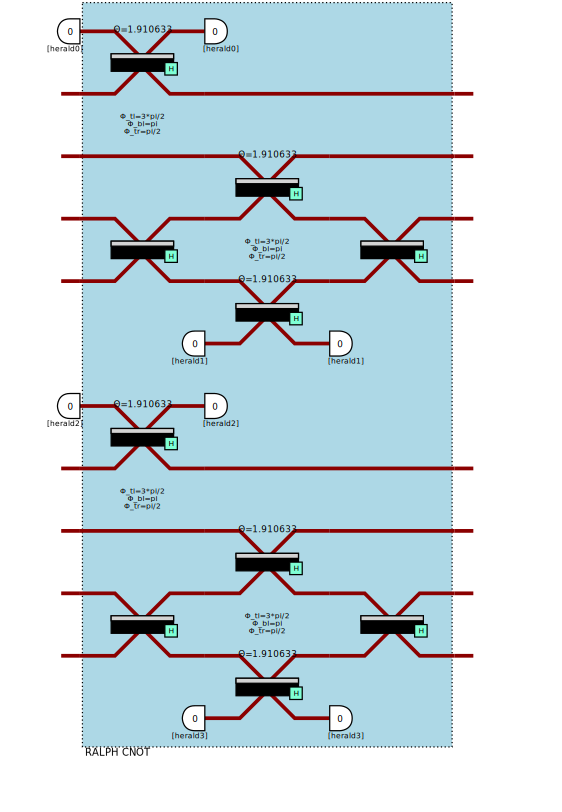

In [2]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [7]:

names = ['./acquired_data/xp_00/data.json','./acquired_data/xp_01/data.json','./acquired_data/xp_02/data.json','./acquired_data/xp_03/data.json','./acquired_data/xp_04/data.json','./acquired_data/xp_05/data.json','./acquired_data/xp_06/data.json','./acquired_data/xp_07/data.json','./acquired_data/xp_08/data.json','./acquired_data/xp_09/data.json']
dictData = {}
Val = {}
delayValArr = []
g2 = 0.007
for name in names:
    TableValue,compareVal,realValMax,realValMin,delayVal,waves,time = calculateCNOT(p,name)
    delayValArr.append(delayVal)
    Val[name[16:21]] = 2*(1-Overlap(waves[0],waves[1],time))
    dictData[name[16:21]] = TableValue
    #print(TableValue)



0.997066*|1,0,1,0,0,0,0,0>+0.076549*|1,0,0,0,0,0,1,0>
0.997066*|1,0,0,1,0,0,0,0>+0.076549*|1,0,0,0,0,0,0,1>
0.997066*|0,1,1,0,0,0,0,0>+0.076549*|0,1,0,0,0,0,1,0>
0.997066*|0,1,0,1,0,0,0,0>+0.076549*|0,1,0,0,0,0,0,1>
╒════╤══════╤══════╤════════════╤════════════╕
│    │   00 │   01 │         10 │         11 │
╞════╪══════╪══════╪════════════╪════════════╡
│ 00 │    1 │    0 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 01 │    0 │    1 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 10 │    0 │    0 │ 0.00390647 │ 0.996094   │
├────┼──────┼──────┼────────────┼────────────┤
│ 11 │    0 │    0 │ 0.996094   │ 0.00390647 │
╘════╧══════╧══════╧════════════╧════════════╛
0.928041*|1,0,1,0,0,0,0,0>+0.372477*|1,0,0,0,0,0,1,0>
0.928041*|1,0,0,1,0,0,0,0>+0.372477*|1,0,0,0,0,0,0,1>
0.928041*|0,1,1,0,0,0,0,0>+0.372477*|0,1,0,0,0,0,1,0>
0.928041*|0,1,0,1,0,0,0,0>+0.372477*|0,1,0,0,0,0,0,1>
╒════╤══════╤══════╤═══════════╤═══════════╕
│    │

In [4]:
""" j = json.dumps(dictData,indent = 4)

with open('data.json', 'w') as f:
    print(j, file=f) """


" j = json.dumps(dictData,indent = 4)\n\nwith open('data.json', 'w') as f:\n    print(j, file=f) "

In [5]:
modelVal = []
for key,table in dictData.items():
    print(tabulate(table,headers='firstrow',tablefmt="fancy_grid"))
    print(Val[key])
    modelVal.append(table[3][3]/(table[3][4]))


╒════╤══════╤══════╤════════════╤════════════╕
│    │   00 │   01 │         10 │         11 │
╞════╪══════╪══════╪════════════╪════════════╡
│ 00 │    1 │    0 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 01 │    0 │    1 │ 0          │ 0          │
├────┼──────┼──────┼────────────┼────────────┤
│ 10 │    0 │    0 │ 0.00390647 │ 0.996094   │
├────┼──────┼──────┼────────────┼────────────┤
│ 11 │    0 │    0 │ 0.996094   │ 0.00390647 │
╘════╧══════╧══════╧════════════╧════════════╛
0.009551622901853962
╒════╤══════╤══════╤═══════════╤═══════════╕
│    │   00 │   01 │        10 │        11 │
╞════╪══════╪══════╪═══════════╪═══════════╡
│ 00 │    1 │    0 │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 01 │    0 │    1 │ 0         │ 0         │
├────┼──────┼──────┼───────────┼───────────┤
│ 10 │    0 │    0 │ 0.0924929 │ 0.907507  │
├────┼──────┼──────┼───────────┼───────────┤
│ 11 │    0 │    0 │ 0.907507  │ 0.0924929 │
╘════╧══════

139.0909882324122


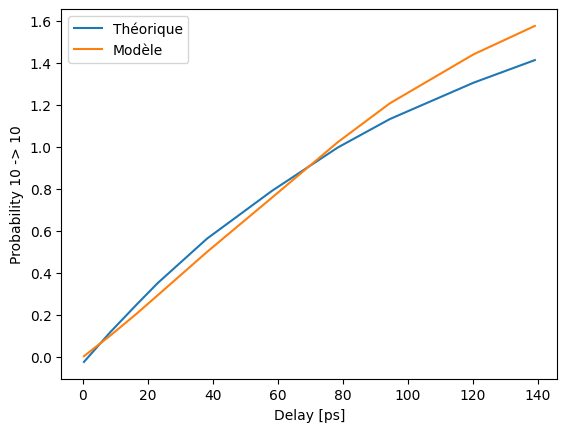

In [8]:
print(delayVal)
plt.plot(delayValArr,Val.values(),label = 'Théorique')
plt.plot(delayValArr,modelVal,label = 'Modèle')
plt.xlabel('Delay [ps]')
plt.ylabel('Probability 10 -> 10')
plt.legend()